In [10]:
import numpy as np
from IPython.display import Audio

def generate_sound(frequency: int, secs_duration: int) -> Audio:
    sample_rate = 44100
    t = np.linspace(0, secs_duration, int(sample_rate * secs_duration), endpoint=False)
    wave = 0.5 * np.sin(2 * np.pi * frequency * t)
    return Audio(wave, rate=sample_rate, autoplay=True)

generate_sound(500, 2)

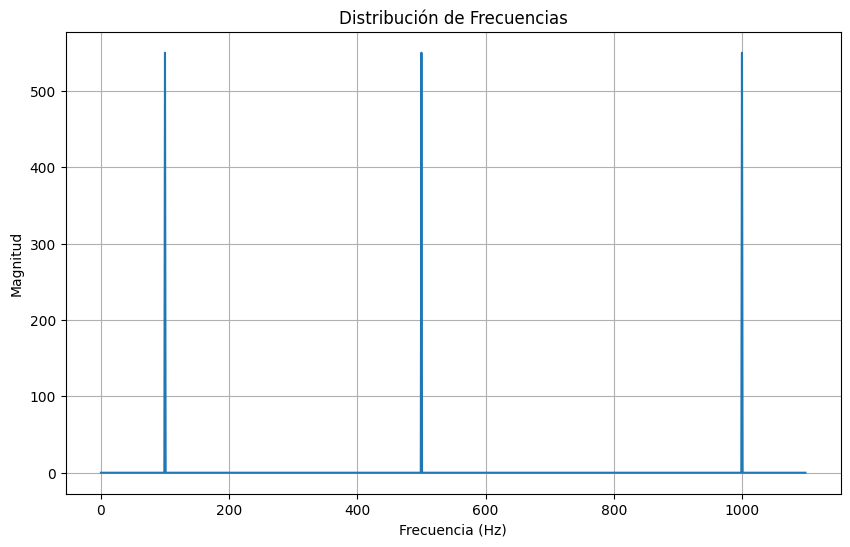

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_synthetic_audio(duration=1.0, sr=2200):
    t = np.linspace(0, duration, int(sr * duration), endpoint=False)
    # Crear tres señales senoidales de diferentes frecuencias
    freq1 = 100  # Frecuencia 1: 100 Hz
    freq2 = 500  # Frecuencia 2: 500 Hz
    freq3 = 1000 # Frecuencia 3: 1000 Hz
    
    signal1 = 0.5 * np.sin(2 * np.pi * freq1 * t)
    signal2 = 0.5 * np.sin(2 * np.pi * freq2 * t)
    signal3 = 0.5 * np.sin(2 * np.pi * freq3 * t)
    
    # Sumar las señales para crear la señal de audio sintética
    synthetic_audio = signal1 + signal2 + signal3
    return synthetic_audio, sr

def plot_audio_fft_from_signal(y, sr):
    # Calcular la FFT
    fft_result = np.fft.fft(y)
    fft_magnitude = np.abs(fft_result)
    frequencies = np.fft.fftfreq(len(fft_result), 1/sr)
    
    # Filtrar solo las frecuencias positivas
    positive_frequencies = frequencies[:len(frequencies)//2]
    positive_fft_magnitude = fft_magnitude[:len(fft_magnitude)//2]
    
    # Graficar la distribución de frecuencias
    plt.figure(figsize=(10, 6))
    plt.plot(positive_frequencies, positive_fft_magnitude)
    plt.title('Distribución de Frecuencias')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud')
    plt.grid()
    plt.show()

# Generar datos sintéticos
synthetic_audio, sr = generate_synthetic_audio()

# Graficar la FFT de la señal sintética
plot_audio_fft_from_signal(synthetic_audio, sr)
